<div style="background-color: #ffb3d9; padding: 10px; border-radius: 5px; text-align: center;">
    <h1><strong>SPOTIFY AND YOUTUBE - EDA <strong></h1>
</div>

<div style="text-align: center; margin-top: 20px;">
  <img src="https://blog.tryshiftcdn.com/uploads/2024/09/blog_1160x600_acf_cropped.png" alt="Exploratory Data Analysis" style="max-width: 100%; border-radius: 5px;">
</div>

<div style="background-color: #ffb3d9; padding: 10px; border-radius: 5px; text-align: center;">
    <h2><strong>Overview of the Analysis<strong></h2>
</div>

In this exploratory data analysis (EDA), we investigate a diverse dataset containing songs from various global artists. The dataset includes critical metrics revealing performance on Spotify and YouTube.

Key features of the dataset include:

- **_Track Information_**: Track name, artist, album details, and links to Spotify and YouTube.
- **_Musical Attributes_**: Metrics such as danceability, energy, loudness, tempo, speechiness, and more.
- **_Engagement Metrics_**: Total streams on Spotify, views, likes, and comments on YouTube.
  
Our analysis followed a structured approach:

1. **_Dataset Exploration_**: A review of the dataset to understand its structure, basic statistics and key variables.
2. **_Data Cleaning_**: The process of cleaning the dataset to address inconsistencies and missing values.
3. **_Data Visualization & EDA_**: The creation of visual representations to highlight trends and distributions, along with the examination of variable relationships in the context of specific analysis questions to derive significant insights.



Through this analysis, we aim to uncover trends and correlations that exist within the dataset, shedding light on how musical attributes relate to user engagement across both platforms. 

<div style="background-color: #ffb3d9; padding: 10px; border-radius: 5px; text-align: center;">
    <h2><strong> 1. Dataset Exploration <strong></h2>
</div>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set plot style and color palette for visualizations
sns.set_palette("husl")

In [2]:
# Load and inspect the initial rows of the dataset
df = pd.read_csv("/Users/okara/OneDrive/Masaüstü/Data/Bitirme Projesi/spotify_youtube_eda.csv")

# Examine the first few records of the data
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [3]:
# Display a summary of the dataset's structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [5]:
# Generate basic statistics for the numerical values in the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20718.0,1.035850e+04,5.980916e+03,0.000000,5.179250e+03,1.035850e+04,1.553775e+04,2.071700e+04
Danceability,20716.0,6.197775e-01,1.652724e-01,0.000000,5.180000e-01,6.370000e-01,7.402500e-01,9.750000e-01
Energy,20716.0,6.352503e-01,2.141468e-01,0.000020,5.070000e-01,6.660000e-01,7.980000e-01,1.000000e+00
Key,20716.0,5.300348e+00,3.576449e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,20716.0,-7.671680e+00,4.632749e+00,-46.251000,-8.858000e+00,-6.536000e+00,-4.931000e+00,9.200000e-01
Speechiness,20716.0,9.645601e-02,1.119600e-01,0.000000,3.570000e-02,5.050000e-02,1.030000e-01,9.640000e-01
Acousticness,20716.0,2.915353e-01,2.862988e-01,0.000001,4.520000e-02,1.930000e-01,4.772500e-01,9.960000e-01
Instrumentalness,20716.0,5.596156e-02,1.932620e-01,0.000000,0.000000e+00,2.405000e-06,4.630000e-04,1.000000e+00
Liveness,20716.0,1.935210e-01,1.685309e-01,0.014500,9.410000e-02,1.250000e-01,2.370000e-01,1.000000e+00
Valence,20716.0,5.298533e-01,2.454408e-01,0.000000,3.390000e-01,5.370000e-01,7.262500e-01,9.930000e-01


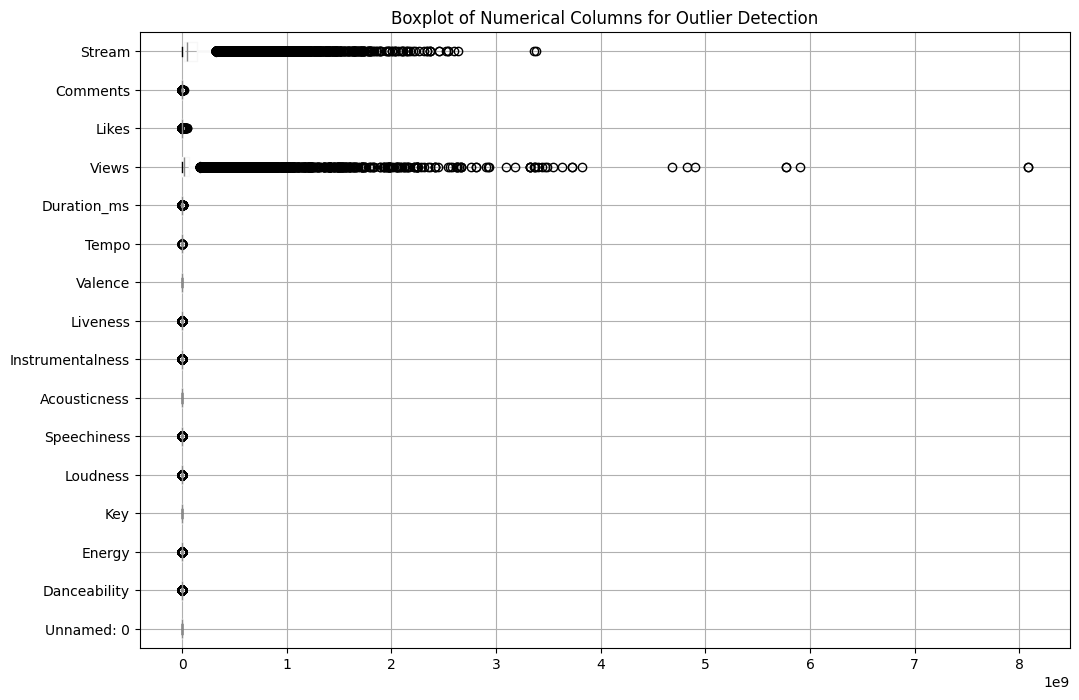

In [9]:
# Boxplot to detect outliers in the numerical columns

df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(12, 8), vert=False)

plt.title('Boxplot of Numerical Columns for Outlier Detection')
plt.show()


<div style="font-size: 14pt; padding: 10px; border-radius: 5px">
  This boxplot visualizes the distribution of numerical variables in the dataset, highlighting potential outliers.</strong> 
  This plot was generated to identify any extreme values that may influence further analysis. In this plot, columns like <strong>"Stream," "Comments," "Likes,"</strong> and <strong>"Views"</strong> show significant outliers, indicating a large variation in their data values. Conversely, columns such as <strong>"Tempo," "Valence,"</strong> and <strong>"Loudness"</strong> appear to have fewer or no extreme outliers, reflecting more consistent distributions.
</div>

In [12]:
# Display the data types of each column in the dataset
df.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [14]:
# Count the number of duplicate rows in the dataset
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


<div style="background-color: #ffb3d9; padding: 10px; border-radius: 5px; text-align: center;">
    <h2><strong> 2. Data Cleaning <strong></h2>
</div>

In [17]:
# Count the number of unique values in each column

df.nunique()

Unnamed: 0          20718
Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> Adding/Removing Columns </strong></h3>
</div>

In [20]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [22]:
# Remove unnecessary columns that are not needed for our analysis
df.drop(columns=['Unnamed: 0','Url_spotify','Uri','Url_youtube','Description','Title','Channel'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Views             20248 non-null  float64
 16  Likes             20177 non-null  float6

In [24]:
# Calculation of Duration Variable in Minutes

df['Duration_minutes'] = (df['Duration_ms'] / (1000 * 60)).round(2)

In [26]:
# Removal of Duration_ms Variable in Milliseconds

df.drop(columns=['Duration_ms'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Views             20248 non-null  float64
 15  Likes             20177 non-null  float64
 16  Comments          20149 non-null  float6

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> Handling Missing Data </strong></h3>
</div>

In [29]:
# Check for missing values

df.isnull().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
Duration_minutes      2
dtype: int64

In [31]:
# Fill missing values in numerical columns using the mean
numerical_missing = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 
                  'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 
                  'Tempo', 'Duration_minutes', 'Views', 'Likes', 'Comments', 'Stream']
df[numerical_missing] = df[numerical_missing].apply(lambda x: x.fillna(x.mean()), axis=0)

In [33]:
# Drop rows with missing values in categorical columns

df = df.dropna(subset=['Licensed', 'official_video'])

df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
Duration_minutes    0
dtype: int64

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> Adjusting Data Types </strong></h3>
</div> 

In [36]:
# Convert the Licensed and official_video variables to Boolean data types

df[['Licensed', 'official_video']] = df[['Licensed', 'official_video']].astype(bool)
df.dtypes

Artist               object
Track                object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Views               float64
Likes               float64
Comments            float64
Licensed               bool
official_video         bool
Stream              float64
Duration_minutes    float64
dtype: object

In [38]:
# Data overview 

df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Views,Likes,Comments,Licensed,official_video,Stream,Duration_minutes
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.6130,0.772,138.559,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,3.71
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.0463,0.852,92.761,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,3.34
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.1160,0.551,108.014,8435055.0,282142.0,7399.0,True,True,6.306347e+07,3.59
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.0640,0.578,120.423,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,3.90
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.0698,0.525,167.953,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,5.68


<div style="background-color: #ffb3d9; padding: 10px; border-radius: 5px; text-align: center;">
    <h2><strong> 3. Data Visualization & EDA <strong></h2>
</div> 

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> Distribution of Continuous Variables </strong></h3>
</div> 

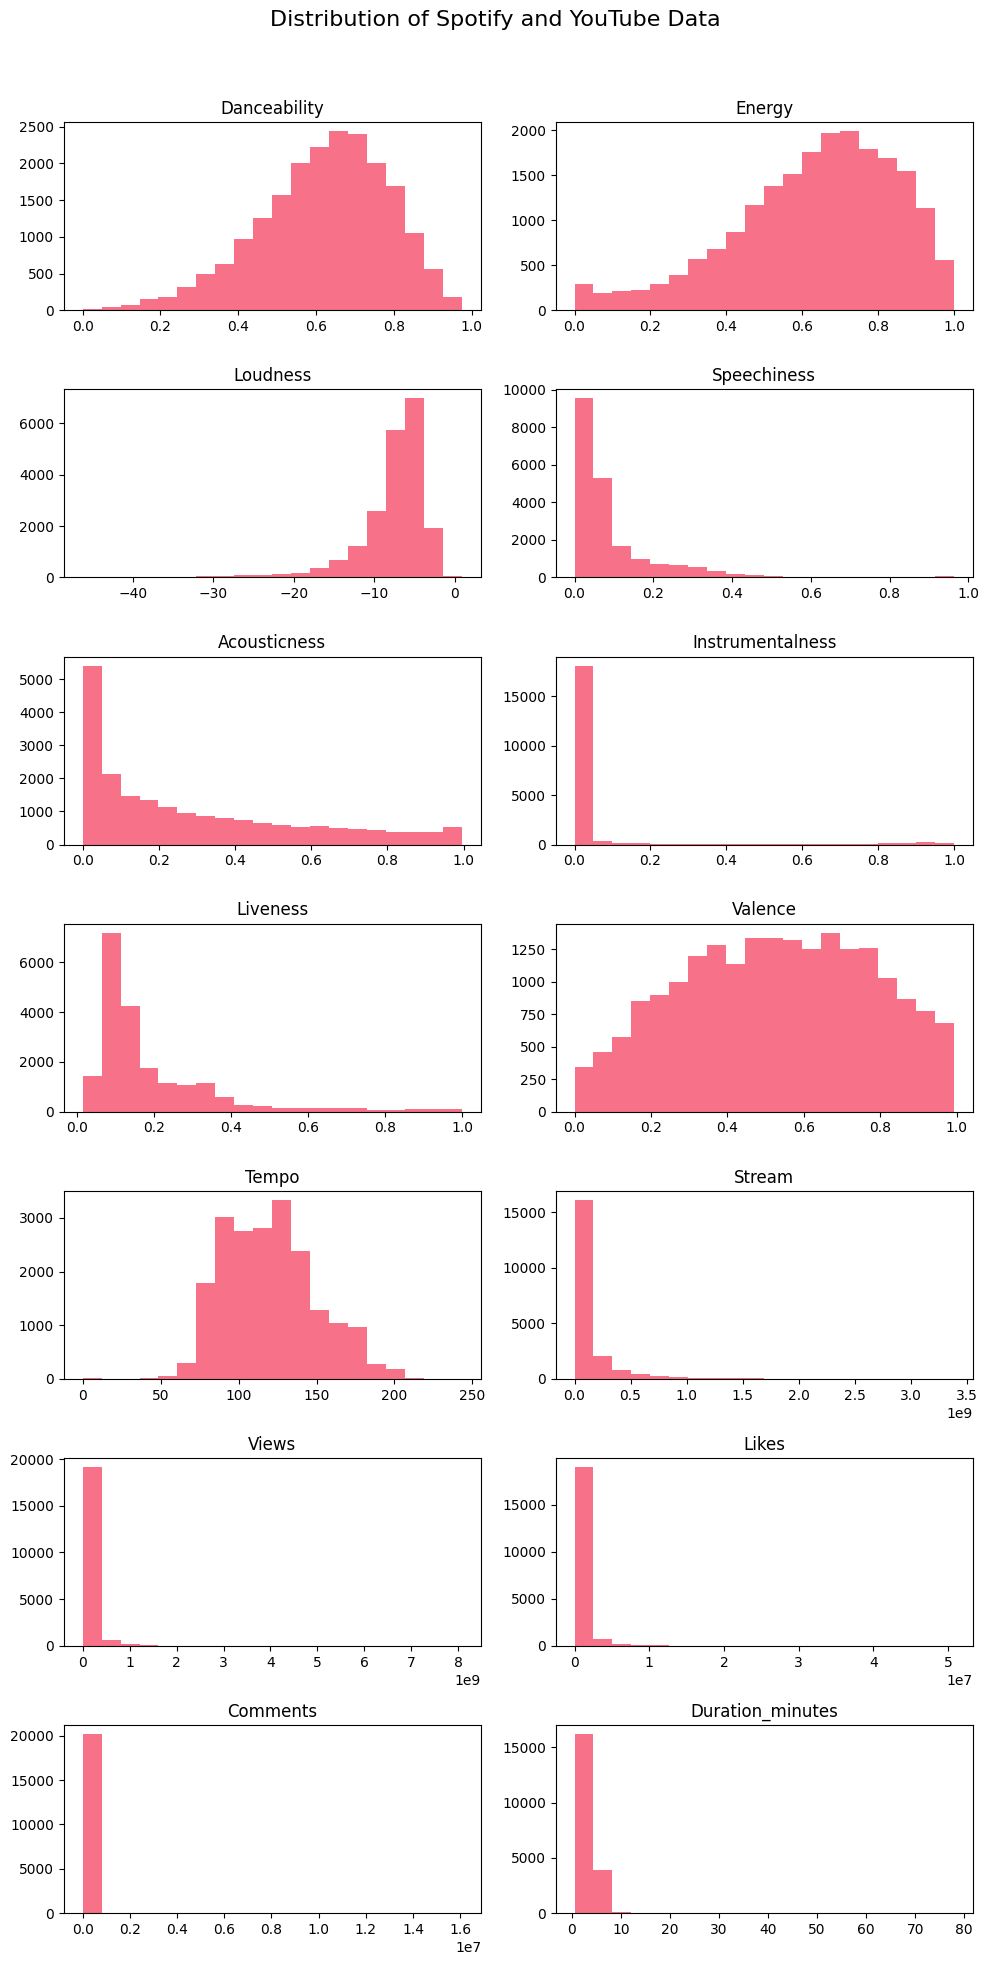

In [42]:
numerical_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
           'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Stream', 
           'Views', 'Likes', 'Comments', 'Duration_minutes']

# Configure subplot settings
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
fig.suptitle('Distribution of Spotify and YouTube Data', fontsize=16)

# Plot histograms for each subplot
for col, ax in zip(numerical_columns, axes.flatten()):
    ax.hist(df[col], bins=20)  
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Keeps space for the main title
plt.show()

- **_Danceability:_** Most songs have danceability values concentrated between 0.5 and 0.8, indicating an average level of danceability. The distribution appears slightly skewed to the right, as lower danceability values are less frequent.


- **_Energy:_** Energy levels are primarily concentrated between 0.6 and 0.8, suggesting that most songs have high energy, aiming to evoke an active feeling in listeners. The distribution is slightly skewed to the left, with higher energy values being more common.

- **_Loudness:_** Loudness values mostly range from -10 to -5 dB, indicating that the majority of songs are recorded at a high volume. This distribution is right-skewed, with most songs concentrated around -10 dB.

- **_Speechiness:_** The speechiness values are concentrated between 0.0 and 0.1, revealing that most songs contain minimal spoken-word elements. The graph shows a clear right skew, as songs with higher speech-like characteristics are less frequent.

- **_Acousticness:_** While the distribution of acousticness is broad, values are generally concentrated between 0.0 and 0.2. This suggests that most songs have an electronic or digital structure rather than an acoustic one. The graph shows a right skew due to the rarity of highly acoustic songs.

- **_Instrumentalness:_** Values are predominantly near 0.0, indicating that most songs include vocals rather than being purely instrumental. This distribution is also right-skewed, as instrumental tracks are less common.

- **_Liveness:_** Liveness values are mainly between 0.1 and 0.3, suggesting that most songs are studio recordings rather than live performances. The right skew of the graph reflects the scarcity of live recordings.

- **_Valence:_** The emotional positivity of songs is typically concentrated between 0.4 and 0.6, indicating that most songs evoke neither overly positive nor overly negative emotions. The distribution appears symmetrical with no noticeable skew.

- **_Tempo:_** Although tempo spans a wide range, most songs fall within the 90-120 BPM range, common in popular music. The distribution is nearly symmetric but shows a slight right skew, as extremely high-tempo songs are less frequent.

- **_Duration (minutes):_** Song durations are generally concentrated between 2 to 5 minutes, reflecting the   popular musichfor popular music.


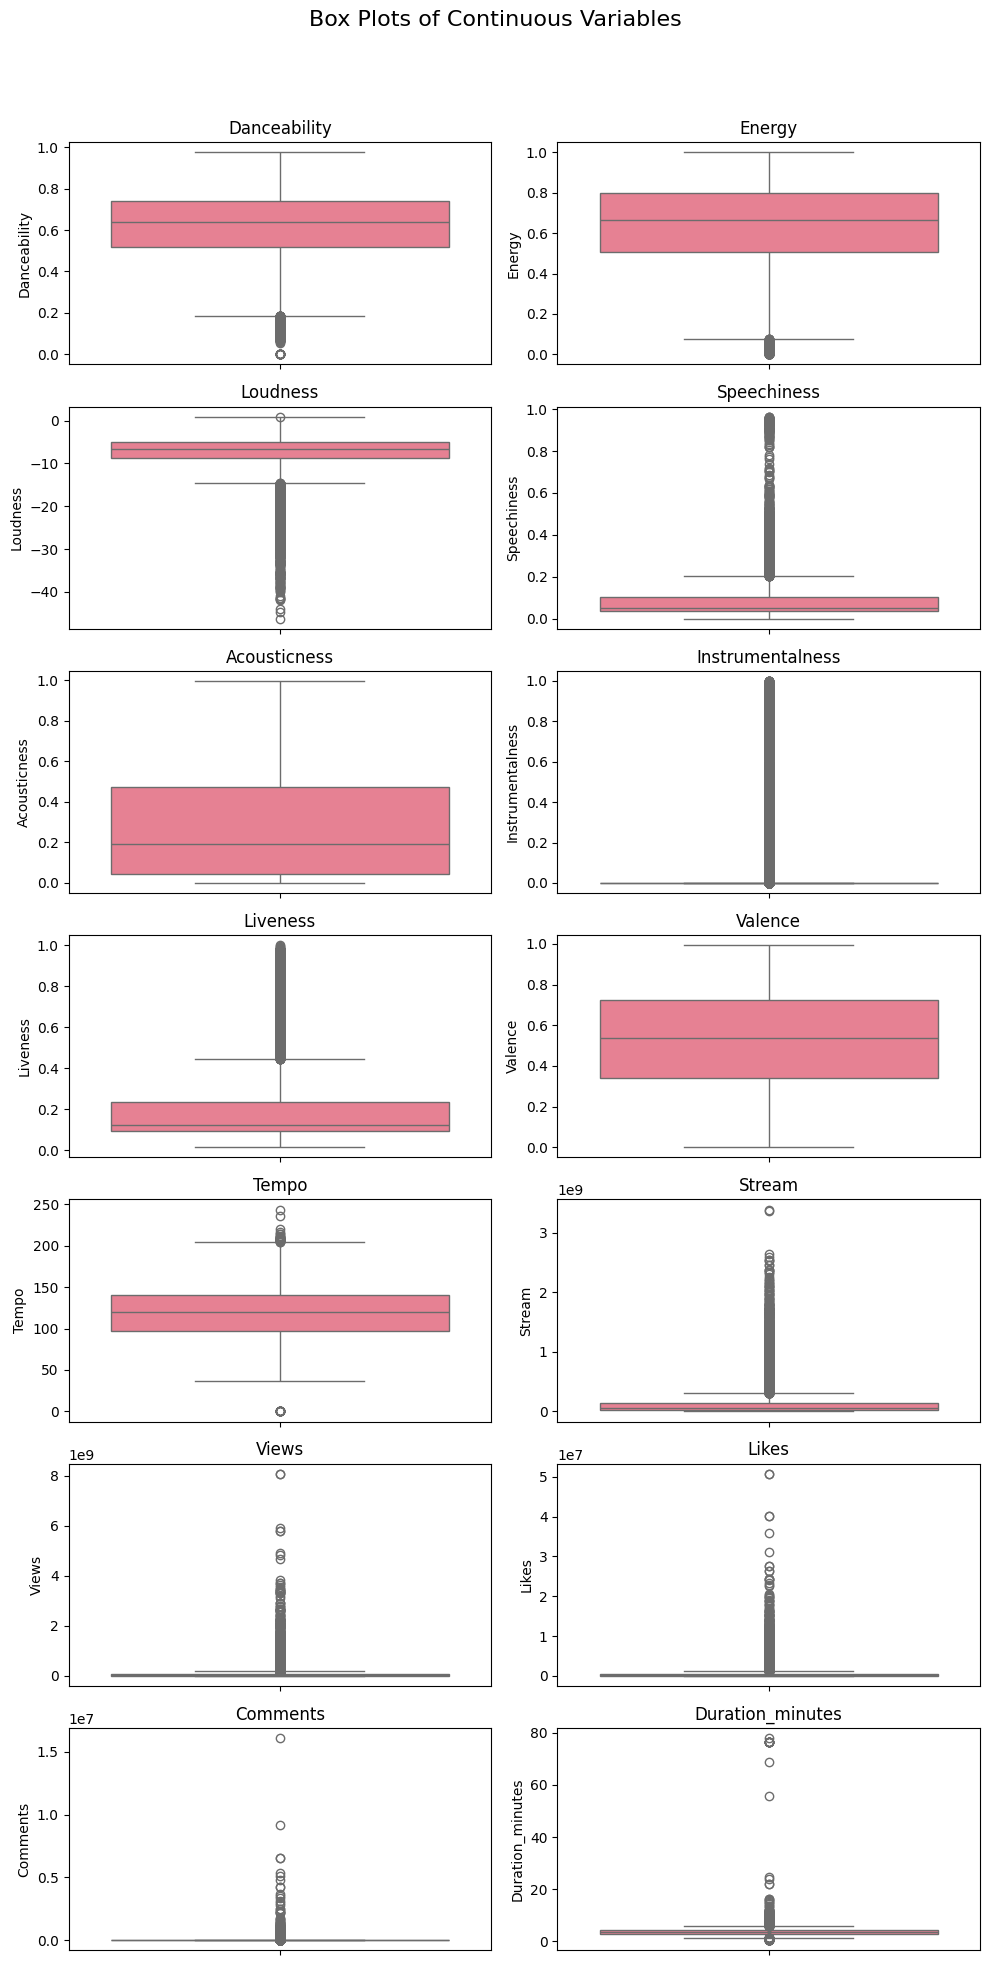

In [44]:
# Configure subplot settings for box plots of continuous variables
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
fig.suptitle('Box Plots of Continuous Variables', fontsize=16)

# Plot box plots for each continuous variable
for col, ax in zip(numerical_columns, axes.flatten()):
    sns.boxplot(data=df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px">

- **_Danceability:_** The distribution shows that most songs are moderately to highly danceable, with values ranging from around 0.5 to 0.8. A few songs have significantly lower danceability (outliers).

- **_Energy:_** Most songs have a high energy level, indicated by the concentration of values around 60–70. The high energy aligns with the popularity of upbeat, lively tracks. Outliers represent less intense tracks, which might include softer or slower-paced songs.

- **_Loudness:_** The loudness values are widely spread, with a median around -5 dB. There are outliers on both the lower and higher ends, suggesting some songs have extreme loudness values.

- **_Speechiness:_** The skew towards lower values shows that most tracks in the dataset do not contain much-spoken word. Outliers represent tracks with higher speech content, potentially including rap, spoken word, or genres where vocals are dominant.

- **_Acousticness:_** The values are spread across the full range, with a higher concentration between 0.1 and 0.5. This suggests a mix of both acoustic and non-acoustic songs in the dataset. Many songs exhibit low acousticness, indicating a stronger presence of electronic or amplified sounds, while many others have high acousticness, suggesting a more natural or acoustic sound.

- **_Instrumentalness:_** Most songs have values close to zero, suggesting they contain vocals, which is common in mainstream music. The outliers with higher instrumentalness indicate instrumental tracks or songs with minimal vocal elements.

- **_Liveness:_** The median value is around 0.2, but there are some outliers with higher liveness values. It can be observed that most of the songs in our dataset are not live recordings. The few outliers with high liveness may represent tracks recorded in live settings.

- **_Valence:_** The distribution is relatively balanced, with values spread between 0.2 and 0.8. This implies that the dataset includes both positive and negative emotional tones.

- **_Tempo:_** The median tempo of around 120 BPM is typical for popular music. Outliers represent songs with unusually fast or slow tempos, may possibly correspond to specific genres like electronic dance music.

- **_Duration_minutes:_** The concentration around 2 to 4 minutes is typical for mainstream music, catering to listener preferences and radio play. Outliers with longer durations may represent genres known for extended tracks.

- **_Stream, Views, Likes and Comments:_** The box plots for these features reveal significant variability in song popularity and engagement metrics. While most songs show moderate levels of engagement, a few outliers stand out with exceptionally high values. This skewed distribution mirrors trends seen in streams, views, and likes, where a small number of tracks dominate. These outliers likely correspond to globally popular hits that have gained massive attention and fan support, reflecting the "hit song" phenomenon across various platforms.s.nic dance music.
</div>

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> Correlation Analysis of Continuous Variables </strong></h3>
</div> 

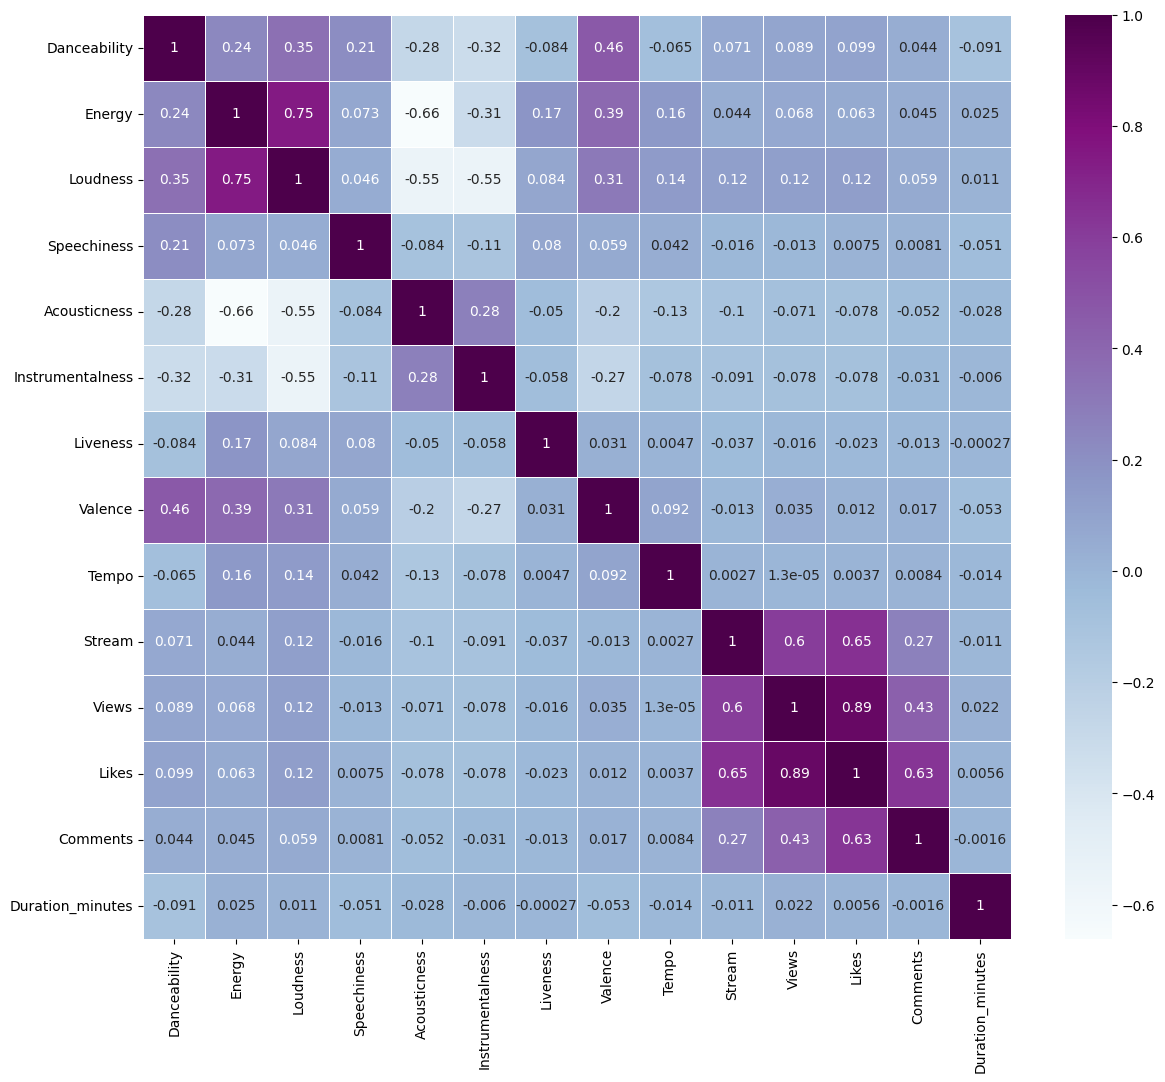

In [48]:
# Calculate the correlation matrix for continuous variables
num_columns_corr = df[numerical_columns].corr()

# Plot heatmap 
plt.figure(figsize=(14, 12))
sns.heatmap(num_columns_corr, annot=True, cmap='BuPu', linewidths=0.5)
plt.show()


<div style="font-size: 14pt; padding: 10px; border-radius: 5px">
Here are some key insights from the correlation analysis:

- **_Energy and Loudness (0.75):_** There is a strong positive correlation between energy and loudness. Songs with higher energy tend to be louder, which aligns with the common practice in music production to amplify more energetic tracks.

- **_Views, Likes, and Streams:_**
  - **_Views and Likes (0.89):_** A very high positive correlation exists between views and likes, indicating that songs with more views generally receive more likes.
  - **_Streams and Views (0.66):_** There's a strong correlation between the number of streams and views, suggesting that songs popular on Spotify are also frequently viewed on YouTube.
  - **_Likes and Comments (0.63):_** Songs that receive more likes also tend to attract more comments, likely due to increased listener engagement.
 
    
- **_Danceability and Valence (0.46):_** There is a moderate positive correlation between danceability and valence. This suggests that songs that are more danceable tend to have a more positive, upbeat emotion. However, the correlation is not very strong, so not all danceable tracks will necessarily have a high positive emotional tone.

- **_Instrumentalness and Loudness (-0.55):_** This correlation between instrumentalness and loudness suggests a moderate negative relationship. This means that as a song becomes more instrumental (with fewer vocals), it tends to have lower loudness.

- **_Acousticness and Energy (-0.66):_** There is a strong negative correlation between acousticness and energy. Songs with more acoustic elements generally have lower energy levels, which aligns with the nature of acoustic music being more mellow and relaxed.
</div>

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> Distribution of Categorical Variables </strong></h3>
</div> 

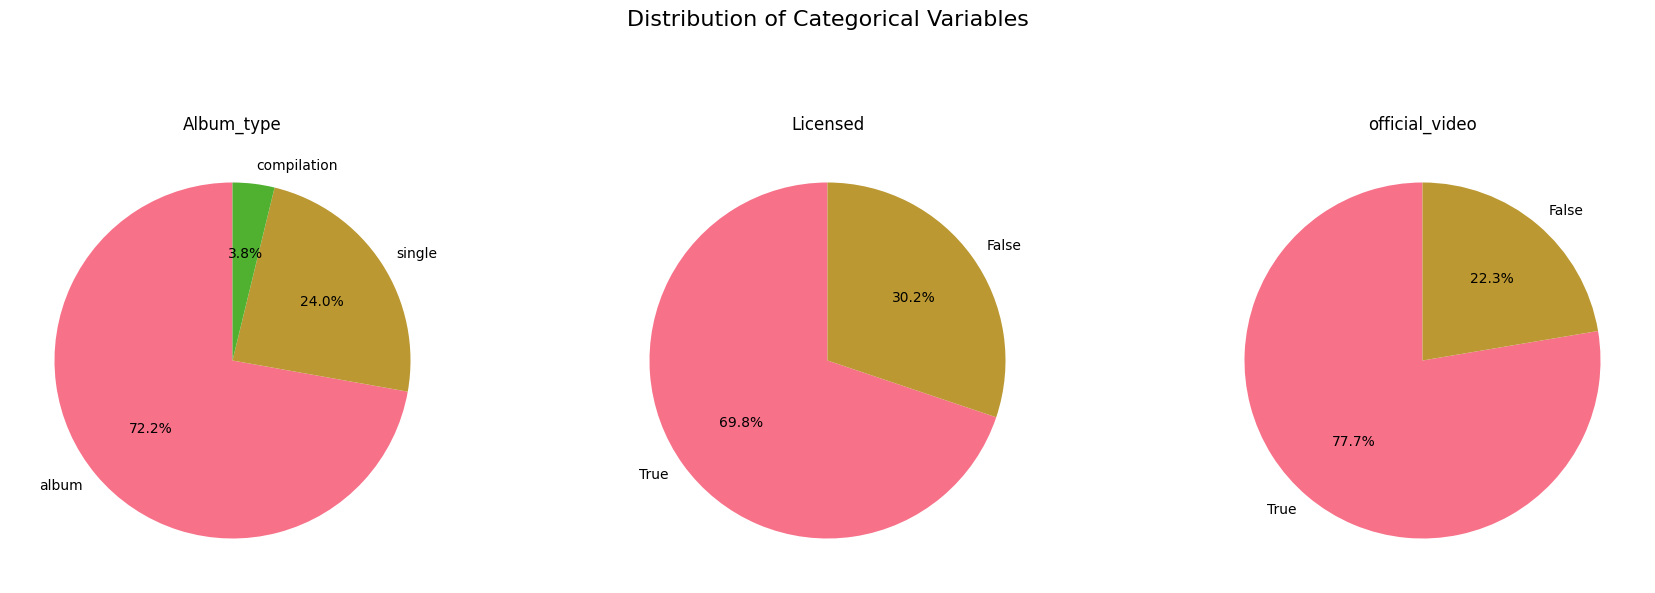

In [52]:
categorical_columns = ['Album_type', 'Licensed', 'official_video']

# Configure subplot settings for pie charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Plot pie charts for each categorical variable
for col, ax in zip(categorical_columns, axes):
    df[col].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{col}')
    ax.set_ylabel('')  


plt.tight_layout(rect=[0, 0, 1, 0.85])  
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px">
    
- **_Album Type:_**
  - The chart shows that the majority of tracks (72.2%) are part of a full album.
  - 24% of the tracks were released as singles, while 3.8% are part of a compilation album.

- **_Licensed:_**
  - According to the chart, 69.8% of the songs are licensed, while 30.2% are not.

- **_Official Video:_**
  - The chart reveals that 77.7% of the songs have an official music video, while 22.3% do not have an official video.
</div>


<div style="background-color: #ffb3d9; padding: 10px; border-radius: 5px; text-align: center;">
    <h2><strong> Questions <strong></h2>
</div> 

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> 1. How do 'Speechiness' and 'Instrumentalness' influence the streams across different music segments? </strong></h3>
</div>  

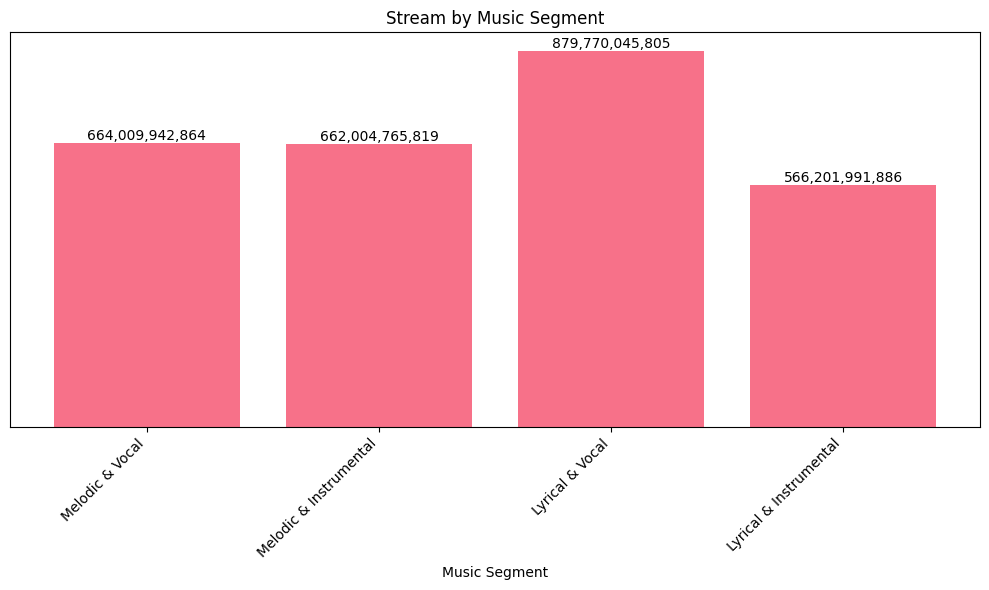

In [58]:
# Define thresholds for segmenting the data based on Speechiness and Instrumentalness
speechiness_threshold = df['Speechiness'].median()
instrumentalness_threshold = df['Instrumentalness'].median()

# Create segments by combining Speechiness and Instrumentalness conditions
df['Segment'] = pd.cut(
    (df['Speechiness'] > speechiness_threshold).astype(int) * 2 + 
    (df['Instrumentalness'] > instrumentalness_threshold).astype(int),
    bins=4,
    labels=[
        'Melodic & Vocal',          # Low Speechiness, Low Instrumentalness
        'Melodic & Instrumental',   # Low Speechiness, High Instrumentalness
        'Lyrical & Vocal',          # High Speechiness, Low Instrumentalness
        'Lyrical & Instrumental'    # High Speechiness, High Instrumentalness
    ]
)

# Calculate the total number of streams for each segment
segment_streams = df.groupby('Segment')['Stream'].sum().reset_index()

# Create a bar plot to visualize the differences between segments
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total stream count per segment
ax.bar(segment_streams['Segment'], segment_streams['Stream'])

# Format numbers with thousands separators
def format_thousands(x, pos):
    return f'{int(x):,}'

ax.yaxis.set_visible(False)

# Annotate the bars with the corresponding stream values
for i, row in segment_streams.iterrows():
    ax.text(row['Segment'], row['Stream'], format_thousands(row['Stream'], None), ha='center', va='bottom')

# Add labels and a title to the chart
ax.set_title('Stream by Music Segment')
ax.set_xlabel('Music Segment')
ax.set_ylabel('Streams')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px">
    The segment with the highest total stream count is <strong>"Lyrical & Vocal"</strong>, showing a higher total stream count than the other segments. This indicates that tracks with high "speechiness" but low "instrumentalness" (i.e., vocal and lyrical tracks) are more popular in the dataset. <strong>"Melodic & Vocal"</strong> and <strong>"Melodic & Instrumental"</strong> segments show similar total stream counts, while <strong>"Lyrical & Instrumental"</strong> has the lowest total stream count. These results suggest that vocal tracks—whether melodic or lyrical—generally perform better in terms of streams compared to instrumental tracks.
</div>

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> 2. How do 'Danceability' and 'Energy' vary across different album types? </strong></h3>
</div> 

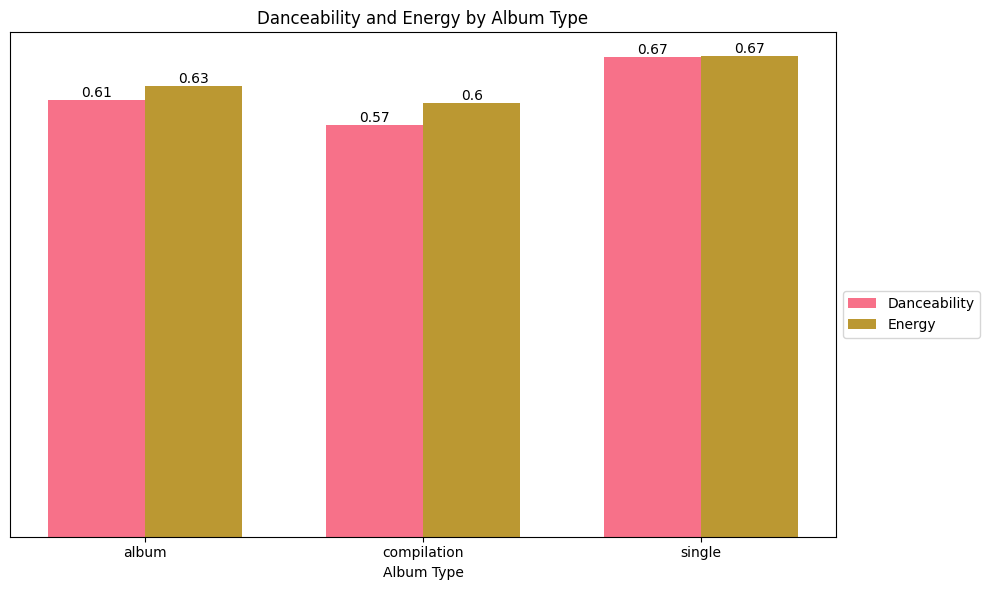

In [62]:
# Group data by Album Type and calculate mean values for Danceability and Energy
grouped_data = df.groupby('Album_type').agg({
    'Danceability': 'mean',
    'Energy': 'mean'
}).reset_index()

# Create a bar chart
plt.figure(figsize = (10,6))

bar_width = 0.35
index = range(len(grouped_data))

# Plot Danceability and Energy bars
bars1 = plt.bar(index, grouped_data['Danceability'], bar_width, label='Danceability')
bars2 = plt.bar([i + bar_width for i in index], grouped_data['Energy'], bar_width, label='Energy')

# Add labels and formatting
plt.xlabel('Album Type')
plt.title('Danceability and Energy by Album Type')
plt.xticks([i + bar_width / 2 for i in index], grouped_data['Album_type'])
plt.gca().yaxis.set_visible(False)  # Hide y-axis for better clarity

# Annotate the bars with values
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px">
    The average Danceability and Energy values are quite similar across album types. <strong>Singles</strong> have the highest averages for both Danceability (0.67) and Energy (0.67). <strong>Compilations</strong> have the lowest averages for Danceability (0.57) and Energy (0.60), suggesting they include a wider range of tracks, possibly with slower or less energetic songs. <strong>Albums</strong> have average values that are higher than compilations but slightly lower than singles. This may indicate that albums likely offer a mix of energetic and more subdued tracks, providing a varied listening experience.
</div>.

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> 3. How do 'Loudness' and 'Energy' levels correlate across various album types? </strong></h3>
</div>  

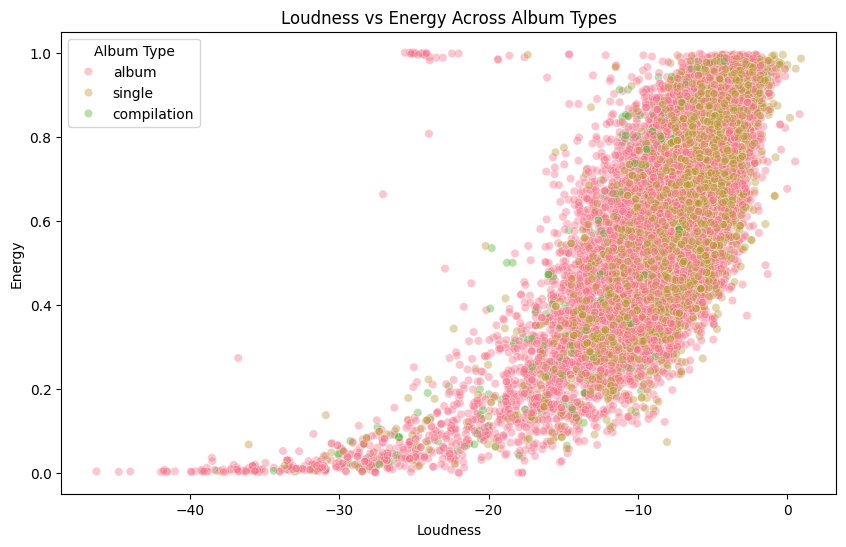

In [66]:
plt.figure(figsize=(10, 6))

# Scatter plot with alpha for transparency based on density
sns.scatterplot(x='Loudness', y='Energy', hue='Album_type', data=df, alpha=0.4)

plt.title('Loudness vs Energy Across Album Types')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.legend(title='Album Type')
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px;">
    <p>
        The scatter plot visualizes the relationship between <strong>loudness</strong> and <strong>energy</strong> across different <strong>album types</strong>. We observe a clear positive correlation between loudness and energy, indicating that as tracks become louder, they tend to exhibit higher energy levels. This pattern is consistent across all album types, although albums and singles appear to dominate the plot, with a dense concentration of data points. <strong>Compilations</strong>, marked in green, are less frequent but seem to follow a similar trend.
    </p>
    <p>
        While the majority of tracks cluster between <strong> -20 to -5 decibels</strong> in loudness and exhibit medium to high energy, outliers—quieter tracks with lower energy levels—are also present. These outliers, though predominantly observed in albums, are also present in singles and compilations.
    </p>
</div>
ns. 

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> 4. How do track durations vary between album types?  </strong></h3>
</div>  

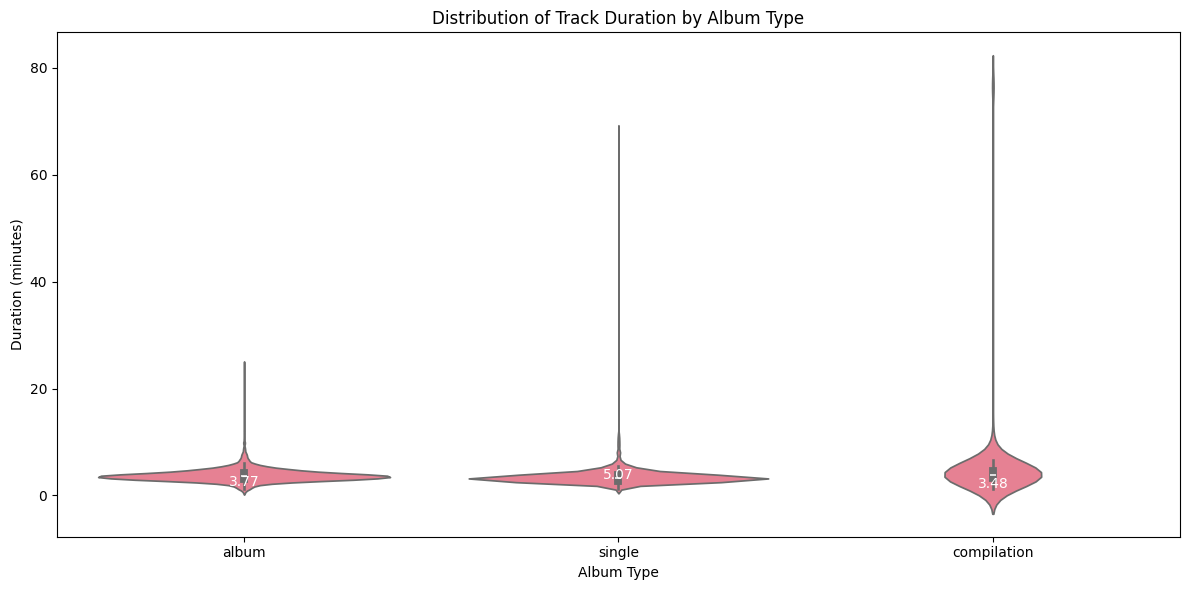

In [70]:
plt.figure(figsize=(12, 6))

# Violin plot
sns.violinplot(x='Album_type', y='Duration_minutes', data=df)

# Ortalama süreleri hesaplama
mean_durations = df.groupby('Album_type')['Duration_minutes'].mean().reset_index()

# Ortalama süreleri grafiğe ekleme
for i, row in mean_durations.iterrows():
    plt.text(i, row['Duration_minutes'], round(row['Duration_minutes'], 2), ha='center', va='top', color='w')

# X ekseni ve başlık
plt.xlabel('Album Type')
plt.ylabel('Duration (minutes)')
plt.title('Distribution of Track Duration by Album Type')

# Grafiği düzenleyip gösterme
plt.tight_layout()
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px">
<p>
        The violin plot provides a detailed view of the distribution of <strong>track durations</strong> across different <strong>album types</strong>. On average, singles have the longest durations at <strong>5.07 minutes</strong>, followed by albums at <strong>3.77 minutes</strong>, and compilations at <strong>3.48 minutes</strong>. This suggests that singles generally feature longer tracks compared to albums and compilations.
    </p>
    <p>
        The distribution for singles and albums shows greater variability, with durations spreading more widely, while compilations tend to have a more concentrated duration range. Notably, the longest duration ranges are associated with compilations, indicating the presence of outliers that may stem from special editions or bonus tracks, while albums exhibit shorter lines and fewer outliers, suggesting more consistency in track lengths.
    </p>
</div> 

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> 5. How does the distribution of licensed vs. non-licensed tracks vary across different album types? </strong></h3>
</div>  

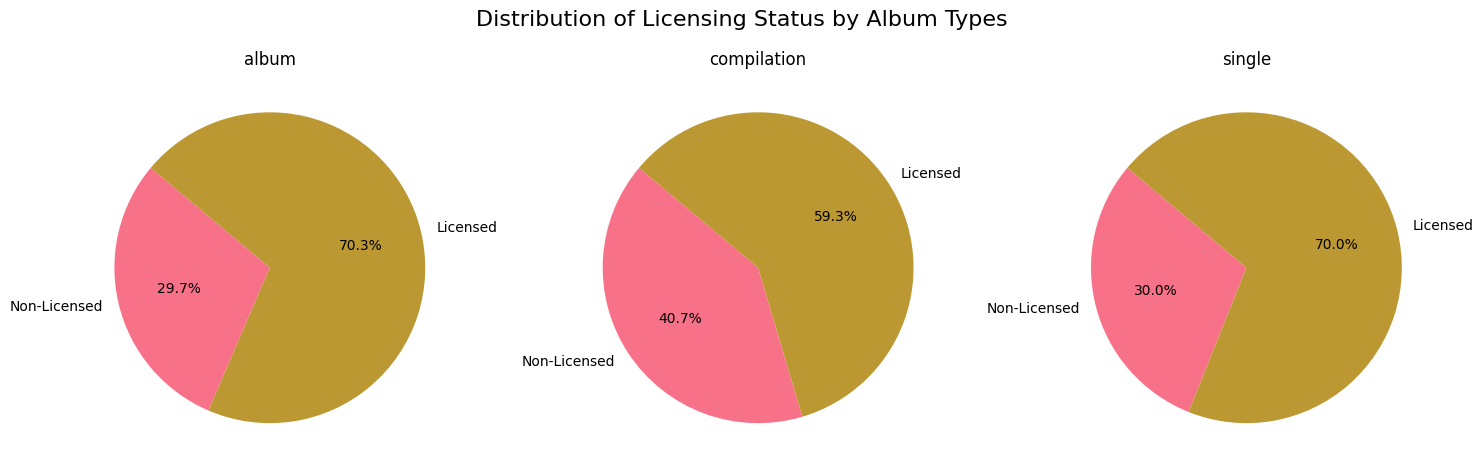

In [74]:
license_dist = df.groupby(['Album_type', 'Licensed'])['Track'].count().unstack()

# Create a subplot based on the number of album types
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define label mapping
label_map = {True: 'Licensed', False: 'Non-Licensed'}

# Iterate over the album types and plot each pie chart
for i, album in enumerate(license_dist.index):
    data = license_dist.loc[album]
    ax = axes[i]  # Select the subplot for each pie chart
    labels = [label_map[label] for label in data.index]  # Apply label mapping
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title (f'{album}')

plt.suptitle('Distribution of Licensing Status by Album Types', fontsize=16)

plt.tight_layout()
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px">
    <p>The pie charts illustrate the distribution of licensed versus non-licensed tracks across three <strong>album types</strong>: album, compilation, and single. The "album" category shows a significant prevalence of licensed tracks, constituting <strong>70.3%</strong> of the total, while non-licensed tracks make up <strong>29.7%</strong>. This suggests that full albums are likely to have more formal licensing arrangements, potentially reflecting higher production values or commercial intent.</p>
    <p>In contrast, the "compilation" category displays a more balanced distribution, with licensed tracks accounting for <strong>59.3%</strong> and non-licensed tracks at <strong>40.7%</strong>. This might indicate that compilations often include a mix of tracks, possibly sourced from various artists or labels, where licensing agreements can vary.</p>
    <p>The "single" category shows a similar trend to the album category, with <strong>70%</strong> licensed and <strong>30%</strong> non-licensed tracks. This further reinforces the notion that singles, like albums, are typically associated with more established commercial practices regarding licensing.</p>
</div>

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> 6. Does the video licensing status influence user engagement metrics, such as views, likes, and comments on YouTube, as well as streams on Spotify, in different ways? </strong></h3>
</div> 

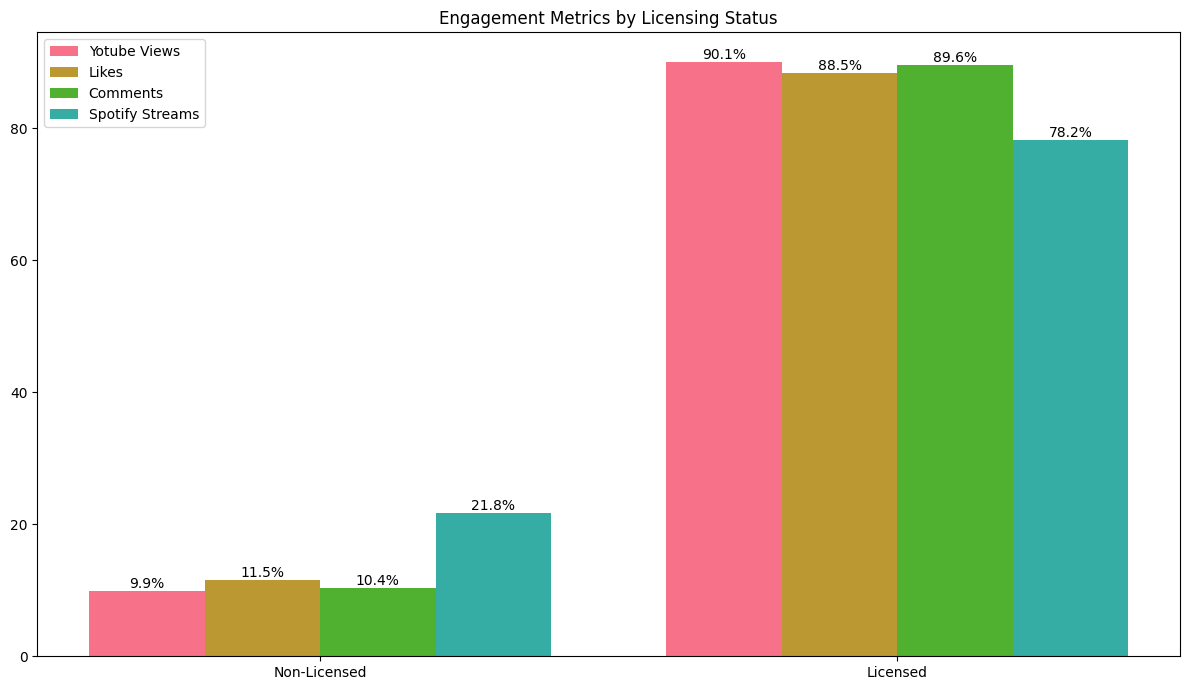

In [82]:
# Calculate total views, likes, comments, and streams across all videos
total_views = df['Views'].sum()
total_likes = df['Likes'].sum()
total_comments = df['Comments'].sum()
total_streams = df['Stream'].sum()

# Group by 'Licensed' to calculate total metrics for licensed and non-licensed videos
metrics_by_video_type = df.groupby('Licensed').agg({
    'Views': 'sum',
    'Likes': 'sum',
    'Comments': 'sum',
    'Stream': 'sum'
}).reset_index()

# Calculate percentages for views, likes, comments, and streams for each video type
metrics_by_video_type['Views_Percentage'] = metrics_by_video_type['Views'] / total_views * 100
metrics_by_video_type['Likes_Percentage'] = metrics_by_video_type['Likes'] / total_likes * 100
metrics_by_video_type['Comments_Percentage'] = metrics_by_video_type['Comments'] / total_comments * 100
metrics_by_video_type['Streams_Percentage'] = metrics_by_video_type['Stream'] / total_streams * 100

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 7))

# Define bar width and positions
width = 0.2
x = range(len(metrics_by_video_type))

# Plot bars for views, likes, comments, and streams percentages
bar1 = ax.bar([i - 1.5 * width for i in x], metrics_by_video_type['Views_Percentage'], width, label='Yotube Views')
bar2 = ax.bar([i - 0.5 * width for i in x], metrics_by_video_type['Likes_Percentage'], width, label='Likes')
bar3 = ax.bar([i + 0.5 * width for i in x], metrics_by_video_type['Comments_Percentage'], width, label='Comments')
bar4 = ax.bar([i + 1.5 * width for i in x], metrics_by_video_type['Streams_Percentage'], width, label='Spotify Streams')

# Add percentage labels above each bar
for bar in [bar1, bar2, bar3, bar4]:
    for b in bar:
        yval = b.get_height()
        ax.text(b.get_x() + b.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', color='black')

# Set title and x-axis labels
ax.set_title('Engagement Metrics by Licensing Status')
ax.set_xticks(x)
ax.set_xticklabels(metrics_by_video_type['Licensed'].map({False: 'Non-Licensed', True: 'Licensed'}))

# Add legend
ax.legend(loc='best')

plt.tight_layout()
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px;">
    <p>
        While it is expected that <strong>licensed videos</strong>, due to their higher proportion in the dataset, would have higher engagement metrics, the significant disparity in engagement for <strong>non-licensed videos</strong> is noteworthy. The lower-than-expected interaction with non-licensed content suggests that, despite their presence in the dataset, they are not as effective at engaging users on <strong>YouTube</strong>. This may be due to factors such as lower production quality or reduced trustworthiness compared to licensed content.
    </p>
    <p>
        Adding to this, non-licensed songs have a notably higher <strong>streaming rate on Spotify</strong>, at <strong>21.8%</strong>, compared to their YouTube engagement. The higher streaming rate on Spotify may indicate that non-licensed tracks find a more receptive audience on music streaming platforms.
    </p>
</div>

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> 7. How does "Valence"  affect streaming across the licensing status of tracks? </strong></h3>
</div> 

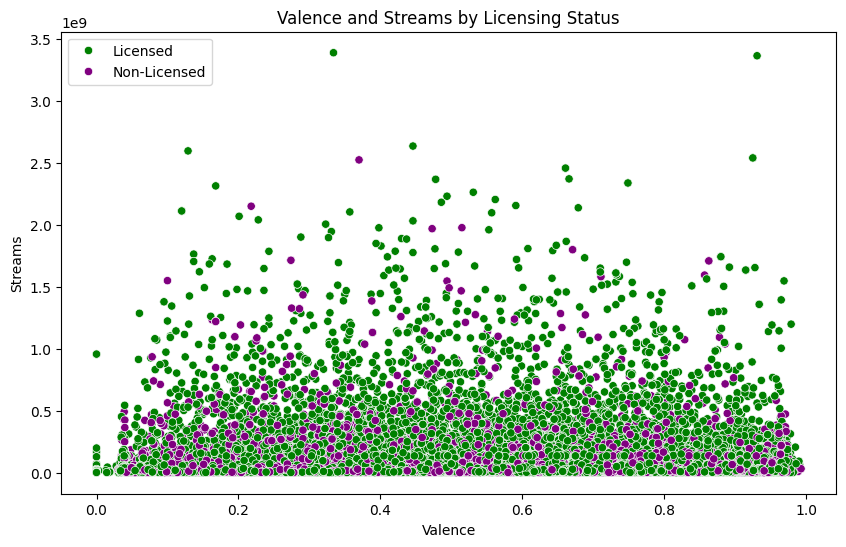

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valence', y='Stream', hue='Licensed', data=df, palette=['green', 'purple'], hue_order=[True, False])
plt.title('Valence and Streams by Licensing Status')
plt.xlabel('Valence')
plt.ylabel('Streams')


handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Licensed', 'Non-Licensed']  # Etiketleri değiştir
plt.legend(handles, labels, title='')  # Başlığı kaldır

plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px;">
    <p>
        The scatter plot depicts the relationship between <strong>valence</strong> and <strong>streams</strong>, differentiated by <strong>licensing status</strong>. Valence is a measure of the musical positiveness conveyed by a track, with higher values indicating a more positive or upbeat tone. In this visualization, <strong>green dots</strong> represent licensed tracks, while <strong>purple dots</strong> signify non-licensed tracks.
    </p>
    <p>
        Overall, there appears to be a broad distribution of streams across various valence levels, indicating that both licensed and non-licensed tracks can achieve substantial stream counts regardless of their emotional tone. However, the licensed tracks are generally more prevalent in the mid to higher valence ranges, suggesting that these tracks may prioritize upbeat, feel-good qualities to resonate with broader audiences.
    </p>
    <p>
        On the other hand, non-licensed tracks exhibit a more varied spread across the valence spectrum, including a notable presence in both lower and higher valence categories. While higher stream counts are observed in both licensing categories, this concentration of non-licensed tracks with lower valence may resonate with a wider array of emotional expressions, potentially catering to niche markets or experimental styles.
    </p>
</div>

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong> 8. Official vs. Unofficial Videos Based on Popularity  </strong></h3>
</div> 

In [90]:
from IPython.display import display, HTML

top_10_percent_threshold = df['Views'].quantile(0.90)

# Filter the dataset for the top 10% most streamed tracks
top_viewed_tracks = df[df['Views'] >= top_10_percent_threshold]

# Count the number of tracks in the top 10%
num_top_viewed_tracks = top_viewed_tracks.shape[0]
display(HTML(f"<h4>Number of top 10% most viewed tracks: <strong>{num_top_viewed_tracks}</strong></h4>"))

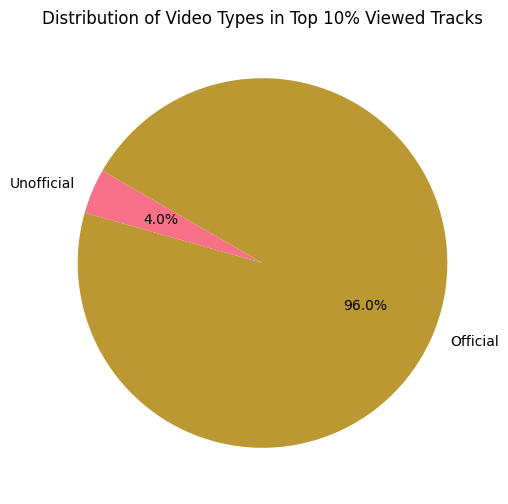

In [92]:
# Group by 'official_video' to count official vs. unofficial music videos
official_vs_unofficial = top_viewed_tracks.groupby('official_video')['Track'].count()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(official_vs_unofficial, labels=['Unofficial', 'Official'], autopct='%1.1f%%', startangle=150)
plt.title('Distribution of Video Types in Top 10% Viewed Tracks')
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px;">
    <p>
        This analysis examines the distribution of <strong>official</strong> versus <strong>unofficial</strong> music videos within the <strong>top 10%</strong> most viewed tracks on YouTube. Out of a dataset of around <strong>20,000 tracks</strong>, <strong>2,025</strong> represent the top 10% most viewed. Among these, <strong>4%</strong> are associated with unofficial videos, while an overwhelming <strong>96%</strong> are tied to official music videos.
    </p>
    <p>
        The significant presence of official videos within the top-performing tracks suggests a relationship between having an official video and higher view counts on YouTube. Official videos may benefit from better visibility, marketing, and promotion, which could explain their dominance in the top 10%. It is also worth noting that unofficial videos can still reach a significant number of views, suggesting that factors beyond the official video status also play a role in determining a video's popularity.
    </p>
</div>y.

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong>  9. TOP 10 Artists according to Youtube views and Spotify streams </strong></h3>
</div> 

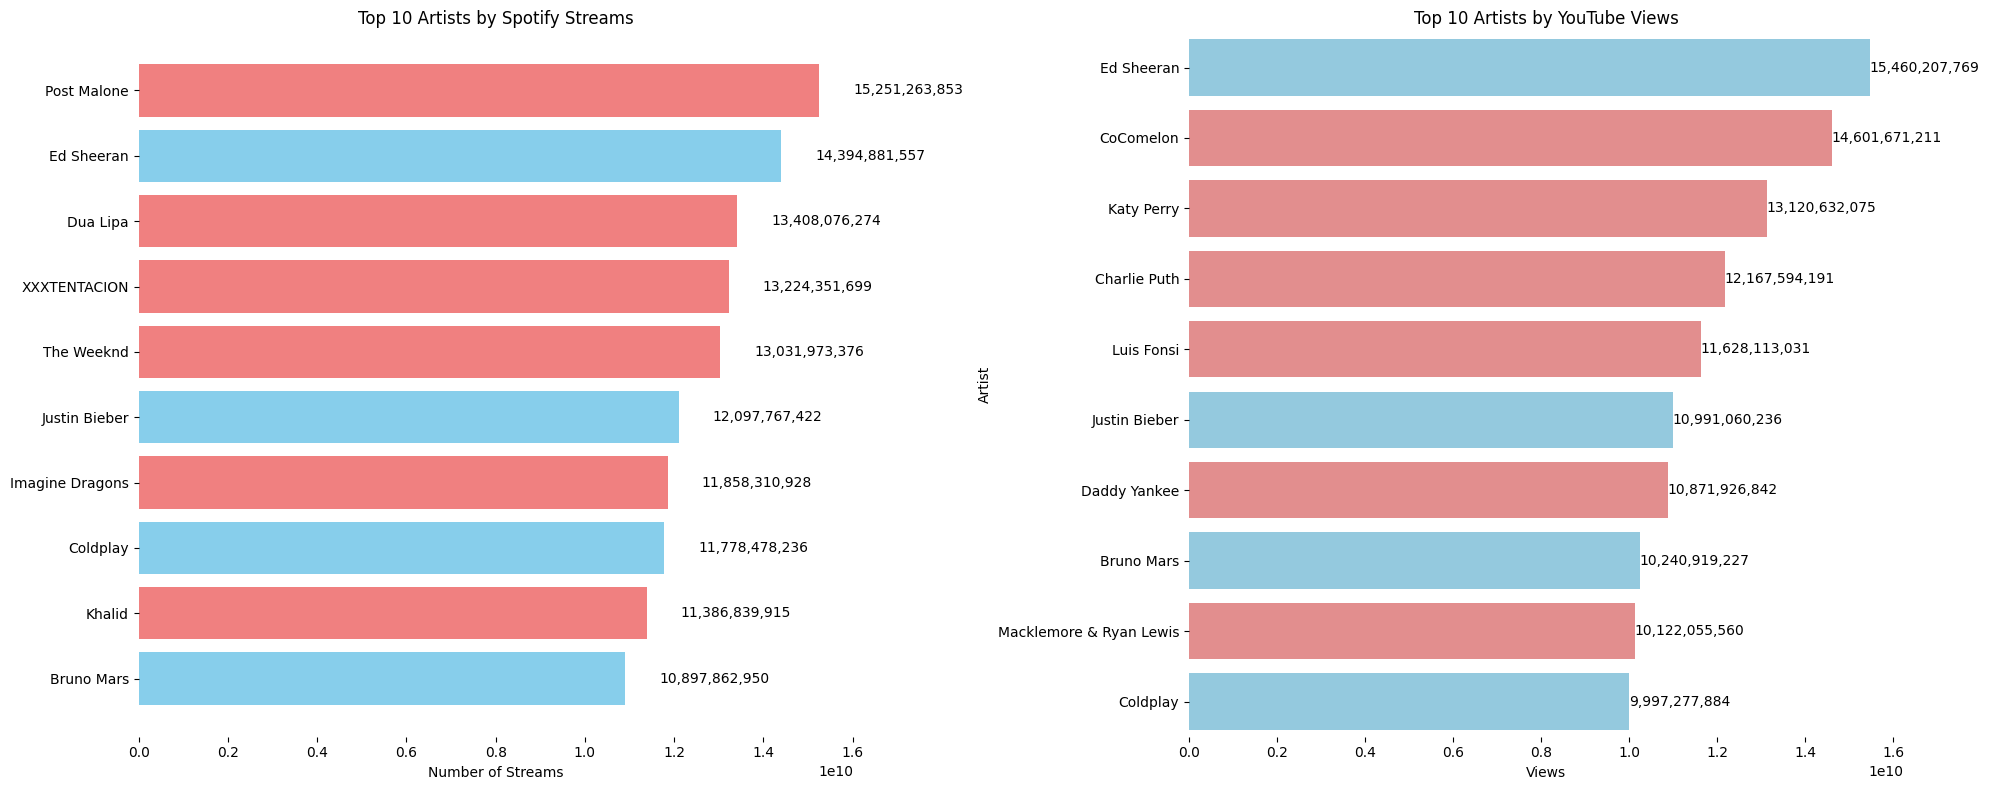

In [96]:
top_10_artist_spotify = df.groupby('Artist').sum(numeric_only=True).sort_values('Stream', ascending=False).reset_index().head(10)
top_10_artist_youtube = df.groupby('Artist').sum(numeric_only=True).sort_values('Views', ascending=False).reset_index().head(10)

# Identify common artists between the two platforms (Spotify and YouTube)
common_artists = set(top_10_artist_spotify['Artist']).intersection(set(top_10_artist_youtube['Artist']))

# Assign colors for bars, using a distinct color for common artists
color_map = {artist: 'skyblue' if artist in common_artists else 'lightcoral' for artist in top_10_artist_spotify['Artist']}

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Spotify Streams Bar Chart (left side)
bars = axs[0].barh(top_10_artist_spotify['Artist'], top_10_artist_spotify['Stream'], color=[color_map[artist] for artist in top_10_artist_spotify['Artist']])
axs[0].set_xlabel('Number of Streams')
axs[0].set_title('Top 10 Artists by Spotify Streams')
axs[0].invert_yaxis()  # Display artists from highest to lowest stream count


for bar in bars:
    axs[0].text(bar.get_width() + 0.05 * top_10_artist_spotify['Stream'].max(), bar.get_y() + bar.get_height()/2, 
                f'{int(bar.get_width()):,}', va='center', ha='left', color='black')

# YouTube Views Bar Chart (right side) 
bars_youtube = sns.barplot(x='Views', y='Artist', data=top_10_artist_youtube, ax=axs[1], 
                           palette=['skyblue' if artist in common_artists else 'lightcoral' for artist in top_10_artist_youtube['Artist']])
axs[1].set_title('Top 10 Artists by YouTube Views')
axs[1].set_xlabel('Views')



for i in axs[1].patches:
    axs[1].text(i.get_width() + 50000, i.get_y() + i.get_height()/2, f'{int(i.get_width()):,}', va='center')

# Remove borders from both charts for a cleaner visual representation
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


plt.tight_layout()
plt.show()


<div style="font-size: 14pt; padding: 10px; border-radius: 5px;">
    <p>
        The analysis of <strong>Spotify</strong> streams and <strong>YouTube</strong> views reveals some potential differences in how audiences may engage with music across these platforms. <strong>Post Malone</strong> leads on Spotify with over 15 billion streams but does not appear in YouTube’s top 10, suggesting his audience might prefer audio streaming. <strong>CoComelon</strong>’s presence on YouTube but absence on Spotify might reflect YouTube’s large viewership among younger audiences or parents, particularly for children’s content. In contrast, <strong>Ed Sheeran</strong> and <strong>Justin Bieber</strong> rank highly on both platforms, with the graph highlighting their presence through distinct bar colors to mark them as common to both lists. This could indicate their widespread appeal across both audio and video formats.
    </p>
    <p>
        <strong>Coldplay</strong> and <strong>Bruno Mars</strong> also appear on both lists, with their streaming and viewing figures being relatively close, indicating a balanced popularity across both platforms. Meanwhile, <strong>Katy Perry</strong> and <strong>Luis Fonsi</strong>’s success on YouTube, possibly driven by visually engaging music videos, could highlight the role of visuals in capturing viewers' attention. Overall, this analysis suggests that some artists may cater to different platform dynamics, with some finding greater success in audio streaming, while others thrive more in video-based formats.
    </p>
</div>s.

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong>  10. Features of TOP 10 songs by Spotify streams and Youtube views </strong></h3>
</div>

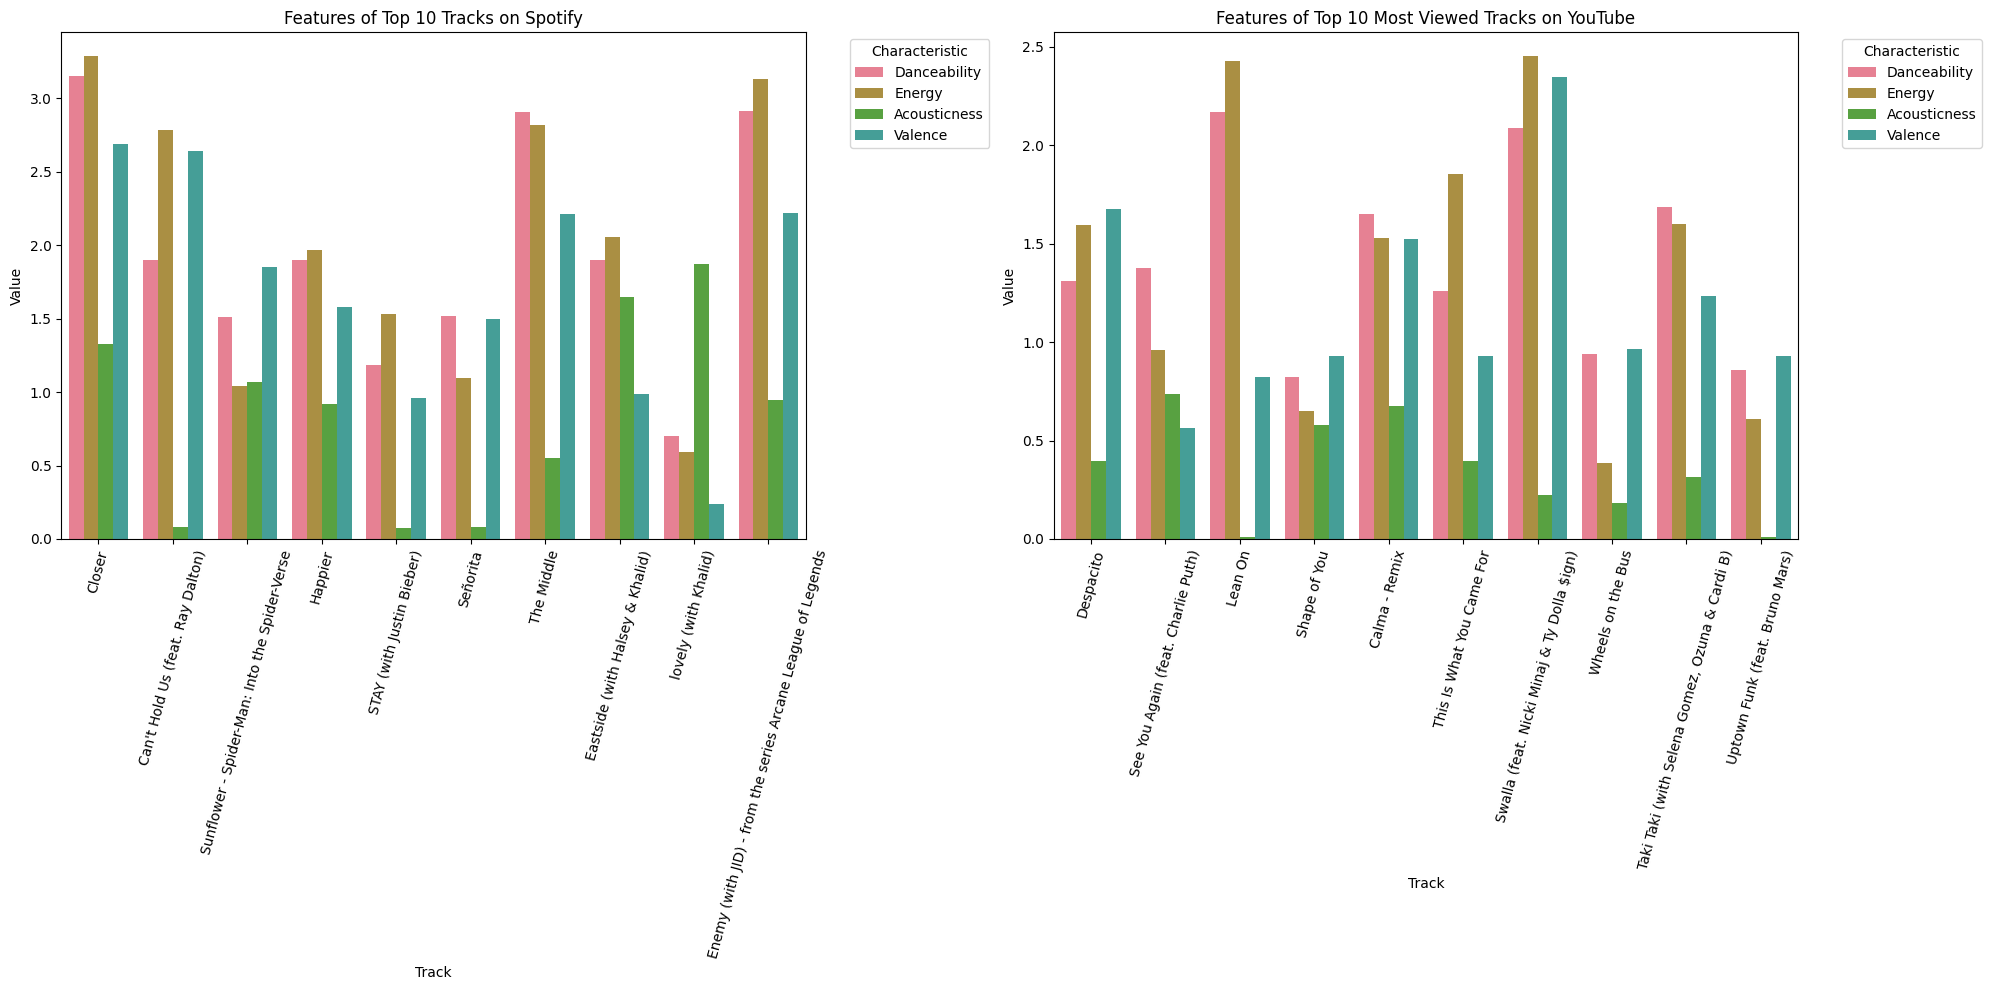

In [101]:
top_10_spotify = df.groupby('Track').sum(numeric_only=True).sort_values('Stream', ascending=False).reset_index().head(10)
top_spotify = top_10_spotify.melt(id_vars='Track', value_vars=['Danceability', 'Energy', 'Acousticness', 'Valence'], var_name='Characteristic', value_name='Value')

top_10_views = df.groupby('Track').sum(numeric_only=True).sort_values('Views', ascending=False).reset_index().head(10)
top_10_views_melted = top_10_views.melt(id_vars='Track', value_vars=['Danceability', 'Energy', 'Acousticness', 'Valence'], var_name='Characteristic', value_name='Value')


fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Spotify Features Chart
sns.barplot(x='Track', y='Value', hue='Characteristic', data=top_spotify, ax=axs[0], dodge=True)
axs[0].set_title('Features of Top 10 Tracks on Spotify')
axs[0].set_xlabel('Track')
axs[0].set_ylabel('Value')
axs[0].legend(title='Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')

# YouTube Features Chart
sns.barplot(x='Track', y='Value', hue='Characteristic', data=top_10_views_melted, ax=axs[1], dodge=True)
axs[1].set_title('Features of Top 10 Most Viewed Tracks on YouTube')
axs[1].set_xlabel('Track')
axs[1].set_ylabel('Value')
axs[1].legend(title='Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')


axs[0].tick_params(axis='x', rotation=75)
axs[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px;">
    <p>
        In this analysis, we examine the <strong>top 10 tracks</strong> on <strong>Spotify</strong> and <strong>YouTube</strong>, focusing on their musical characteristics: <strong>danceability</strong>, <strong>energy</strong>, <strong>acousticness</strong>, and <strong>valence</strong>. Both platforms show a preference for energetic and danceable songs, showcasing high values for these features among their top tracks. On Spotify, songs like <strong>"Closer"</strong> and <strong>"Stay"</strong> highlight a trend towards high energy and positive valence, indicating that the platform's focus on lively, feel-good music engages listeners. Another aspect of Spotify's top tracks is the higher acousticness compared to YouTube. This suggests that Spotify users might have a stronger preference for raw or acoustic elements in their music, possibly because of the platform's more personal, immersive listening experience.
    </p>
    <p>
        On the other hand, YouTube’s most popular tracks, such as <strong>"Lean On"</strong> and <strong>"Despacito"</strong>, are similarly high in energy and danceability but show a much lower acousticness. This could be due to the visual nature of YouTube, where highly produced songs with captivating music videos tend to perform better. This difference likely stems from the nature of how users interact with music on these platforms.
    </p>
</div>

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong>  11. The relationship between the TOP 10 most liked songs and the number of comments on YouTube </strong></h3>
</div> 

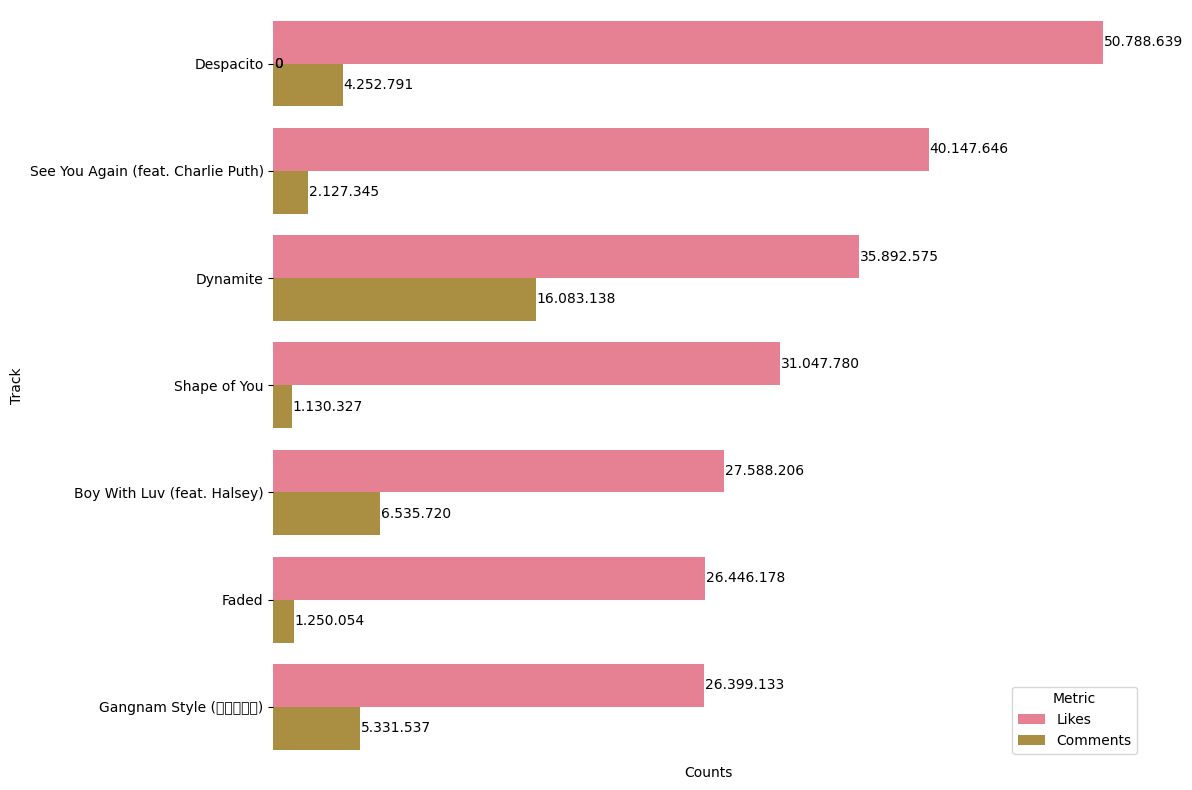

In [126]:
top_10_videos = df.nlargest(10, 'Likes')[['Track', 'Likes', 'Comments']]

# Reshape the data for plotting, transforming 'Likes' and 'Comments' into a single 'Metric' column
data_melted = pd.melt(top_10_videos, id_vars=['Track'], value_vars=['Likes', 'Comments'], var_name='Metric', value_name='Counts')


plt.figure(figsize=(12, 8))

# Generate the bar plot
sns.barplot(x='Counts', y='Track', hue='Metric', data=data_melted)
plt.xticks([])  


# Set the title and labels
plt.xlabel('Counts')
plt.ylabel('Track')
plt.legend(title='Metric', loc='lower right')  

sns.despine(left=True, bottom=True)  

formatter = ScalarFormatter(useOffset=False, useMathText=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

for i in plt.gca().patches:
    plt.text(i.get_width() + 50000, i.get_y() + i.get_height()/2, f'{int(i.get_width()):,}'.replace(',', '.'), va='center')

# Adjust layout for a clean appearance
plt.tight_layout()
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px;">
    <p>
        In previous analyses, we identified a <strong>moderately strong correlation of 0.63</strong> between <strong>likes</strong> and <strong>comments</strong>. When focusing on the top 10 songs by likes and comments, while this correlation remains evident, some differences in engagement within the selected group emerge. For instance, although <strong>"Despacito"</strong> remains the top song in terms of likes, similar to its ranking in views, it receives a relatively lower number of comments compared to other tracks. This indicates that high engagement through likes does not necessarily translate into higher levels of interaction through comments. It suggests that <strong>"Despacito"</strong> may appeal to a broader, more passive audience, where users may like the video but feel less inclined to leave comments. Similarly, songs like <strong>"See You Again"</strong> and <strong>"Shape of You"</strong>, which are also among the most viewed tracks on YouTube, maintain a strong presence in the top likes category, reaffirming their broad appeal.
    </p>
    <p>
        On the other hand, tracks such as <strong>"Boy With Luv"</strong> and <strong>"Dynamite"</strong>, despite not being among the top globally viewed videos, rank highly in both likes and comments. This can likely be attributed to <strong>BTS’s</strong> dedicated fan base. This fandom-driven interaction, where engagement goes beyond mere viewership, helps explain why these songs receive disproportionately high likes and comments relative to their views.
    </p>
    <p>
        In conclusion, while the overall correlation between likes and comments persists within the top 10, the data also shows that certain songs deviate from this trend due to unique factors like fan engagement and emotional resonance.
    </p>
</div>

<div style="background-color: #ffccdd; padding: 10px; border-radius: 5px">
  <h3><strong>  12. How do the TOP 10 highest-tempo tracks compare in terms of popularity across YouTube and Spotify? </strong></h3>
</div>

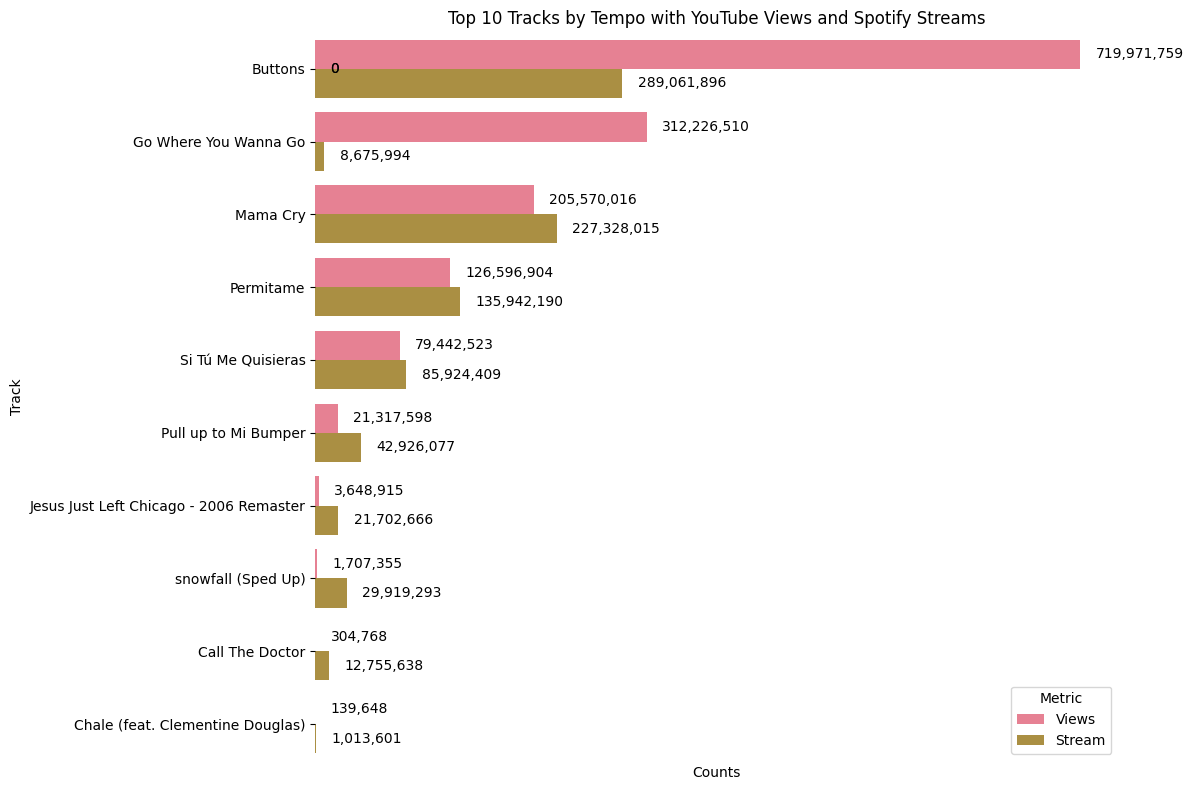

In [134]:
top_10_energy = df.nlargest(10, 'Tempo')[['Track', 'Tempo', 'Views', 'Stream']].sort_values('Views', ascending=False)
top_10_energy_melted = top_10_energy.melt(id_vars='Track', value_vars=['Views', 'Stream'], var_name='Metric', value_name='Counts')


plt.figure(figsize=(12, 8))
sns.barplot(x='Counts', y='Track', hue='Metric', data=top_10_energy_melted, dodge=True)
plt.xticks([])

plt.title('Top 10 Tracks by Tempo with YouTube Views and Spotify Streams')
plt.xlabel('Counts')
plt.ylabel('Track')
sns.despine(left=True, bottom=True) 

for p in plt.gca().patches:
    plt.text(p.get_width() + 0.05 * top_10_energy['Stream'].max(), p.get_y() + p.get_height()/2, 
             f'{int(p.get_width()):,}', va='center', ha='left')

plt.tight_layout()
plt.show()

<div style="font-size: 14pt; padding: 10px; border-radius: 5px;">
    <p>
        In this analysis, songs like <strong>"Buttons,"</strong> <strong>"Permítame,"</strong> and <strong>"Mama Cry"</strong> stand out with substantial view and stream counts, indicating that faster-paced tracks might have universal appeal at first glance. These songs, likely due to their energetic and dynamic nature, can capture attention across audio and visual mediums, leading to widespread popularity. However, the case of <strong>"Go Where You Wanna Go"</strong> provides an interesting contrast. Despite having a similarly high tempo, it shows significantly fewer streams on Spotify (around <strong>8M</strong>) compared to its massive YouTube views (<strong>312M</strong>). This suggests that for this particular song, factors beyond tempo—such as the content of the music video or its virality—could play a key role in driving YouTube engagement, while Spotify listeners may not find it as appealing.
    </p>
    <p>
        Additionally, most of the songs in the graph, like <strong>"Pull Up to Mi Bumper,"</strong> further support this platform-specific trend, showing stronger performance on Spotify while lagging in YouTube views. This demonstrates that while tempo can contribute to cross-platform success, other variables—such as audience preference, genre appeal, and more—also play crucial roles in determining how well a song performs across different media. Therefore, high tempo alone may not be the defining factor for consistent success on both platforms.
    </p>
</div>. 